From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html

# 다양체 학습 (Manifold Learning)

* 높은 차원의 데이터를 저차원으로 축소하는 방법

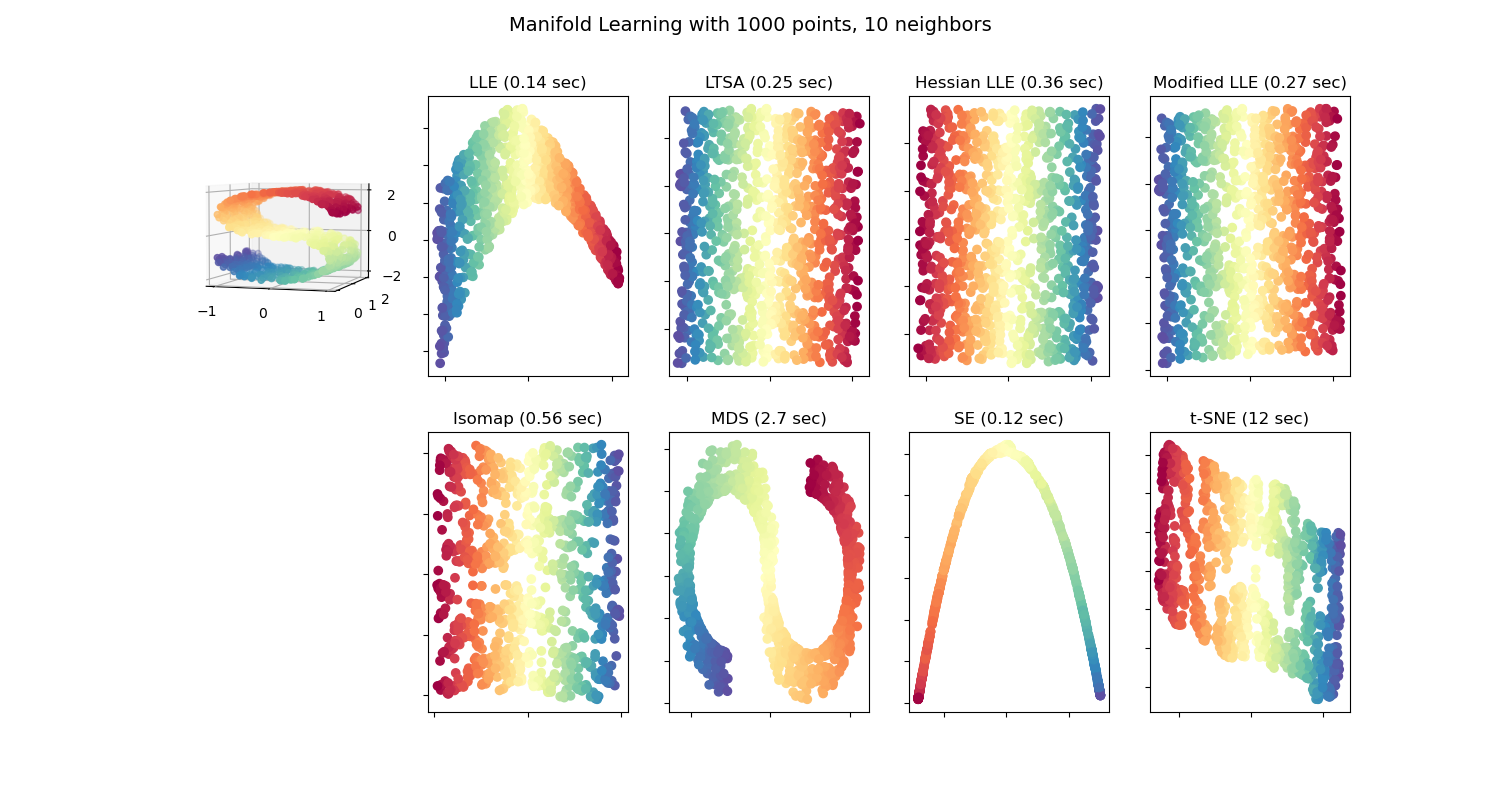

* 고차원 데이터를 2차원 또는 3차원으로 축소해 시각화에 활용할 수 있음
* 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에 활용 가능

## 데이터 생성 및 시각화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [2]:
s_curve, color = datasets.make_s_curve(1000, random_state=2022)

In [3]:
digits, labels = datasets.load_digits(return_X_y=True)
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=2022)
projected_digits = rand_proj.fit_transform(digits)

In [4]:
def min_max_scale(x):
    min_value, max_value = np.min(x,0), np.max(x,0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [5]:
def plot_s_curve(s_curve, color, position, projection):
    s_curve = min_max_scale(s_curve)
    if projection == '3d':
        ax = plt.subplot(position, projection=projection)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=color, cmap=plt.cm.Spectral)
        ax.view_init(4, -72)
    elif projection == '2d':
        ax = plt.subplot(position)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], c=color, cmap=plt.cm.Spectral)

In [6]:
def plot_digits(digits, labels, position, projection):
    digits = min_max_scale(digits)
    if projection == '3d':
        ax = plt.subplot(position, projection=projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], digits[i,2], str(labels[i]), 
                    color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size': 9})
        ax.view_init(4, -72)
    elif projection == '2d':
        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], str(labels[i]), 
                    color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size': 9})

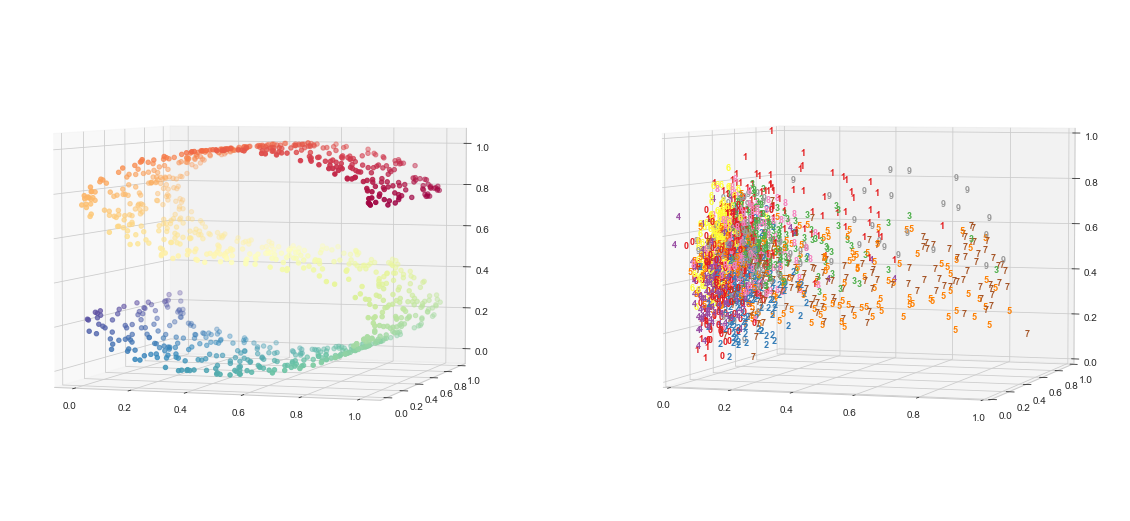

In [7]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve, color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')

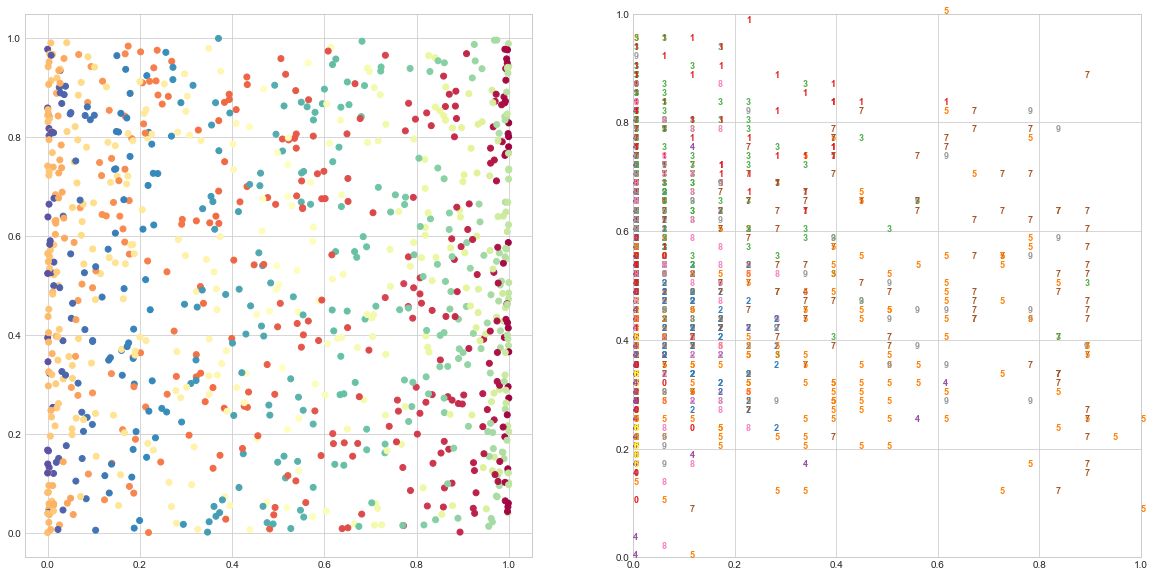

In [8]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve, color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

In [17]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                             method='standard', random_state=2022).fit_transform(s_curve)
digits_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                            method='standard', random_state=2022).fit_transform(digits)

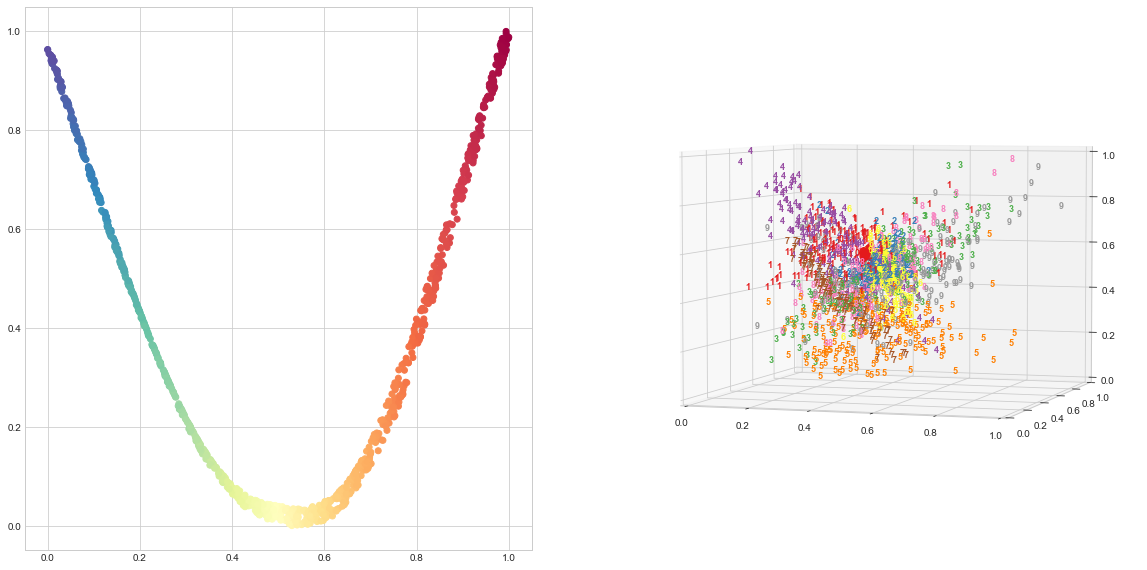

In [18]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_lle, color, 121, '2d')
plot_digits(digits_lle, labels, 122, '3d')

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

In [20]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                             method='ltsa', random_state=2022).fit_transform(s_curve)
digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                            method='ltsa', random_state=2022).fit_transform(digits)

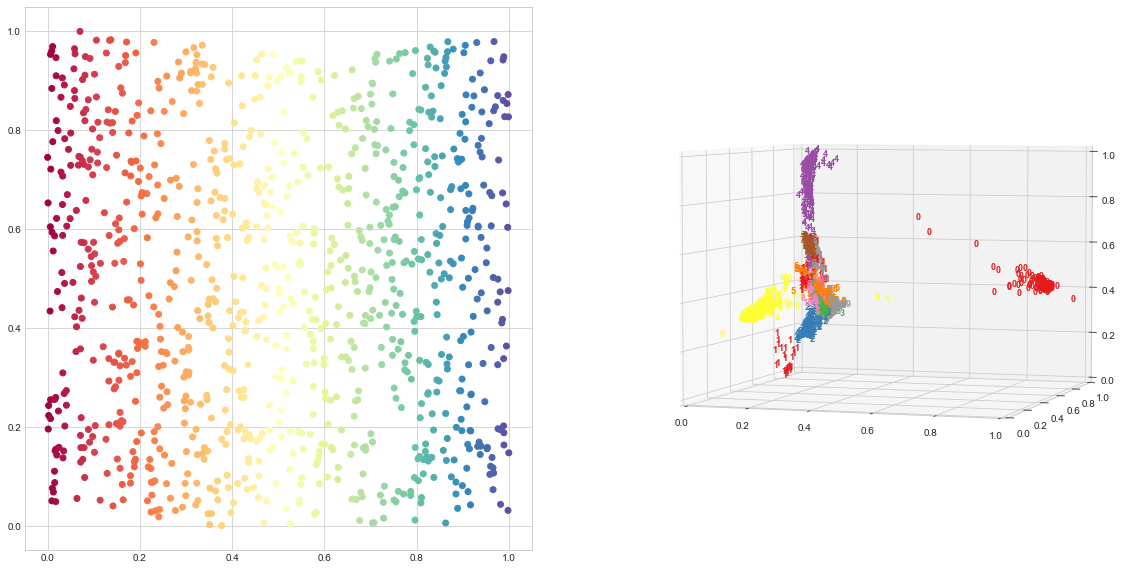

In [22]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_ltsa, color, 121, '2d')
plot_digits(digits_ltsa, labels, 122, '3d')

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

In [23]:
s_curve_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                             method='hessian', random_state=2022).fit_transform(s_curve)
digits_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                            method='hessian', random_state=2022).fit_transform(digits)

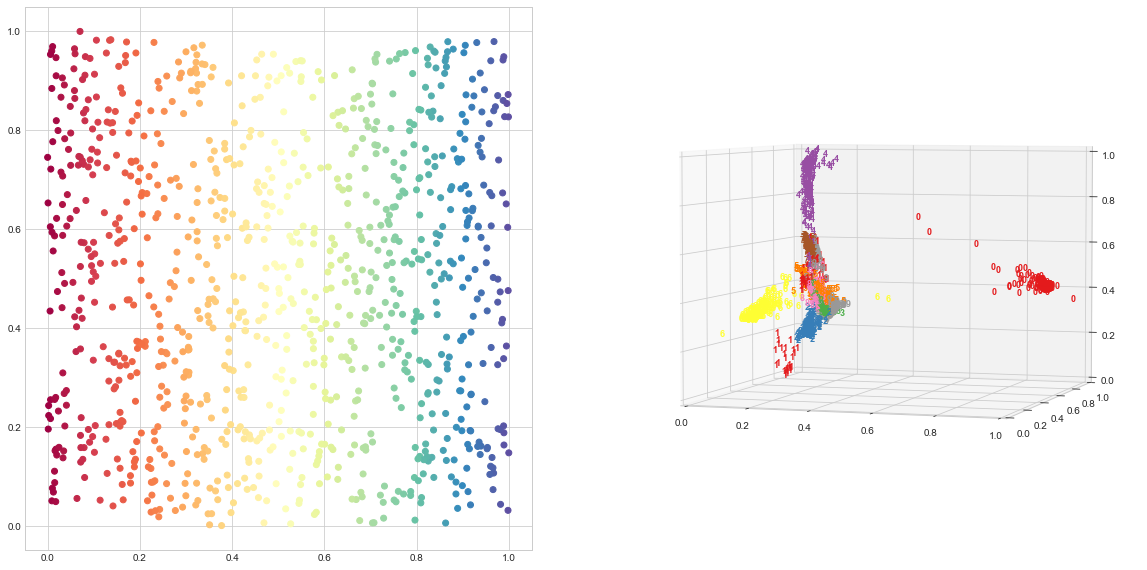

In [24]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_hlle, color, 121, '2d')
plot_digits(digits_hlle, labels, 122, '3d')

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

In [25]:
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                             method='modified', random_state=2022).fit_transform(s_curve)
digits_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                            method='modified', random_state=2022).fit_transform(digits)

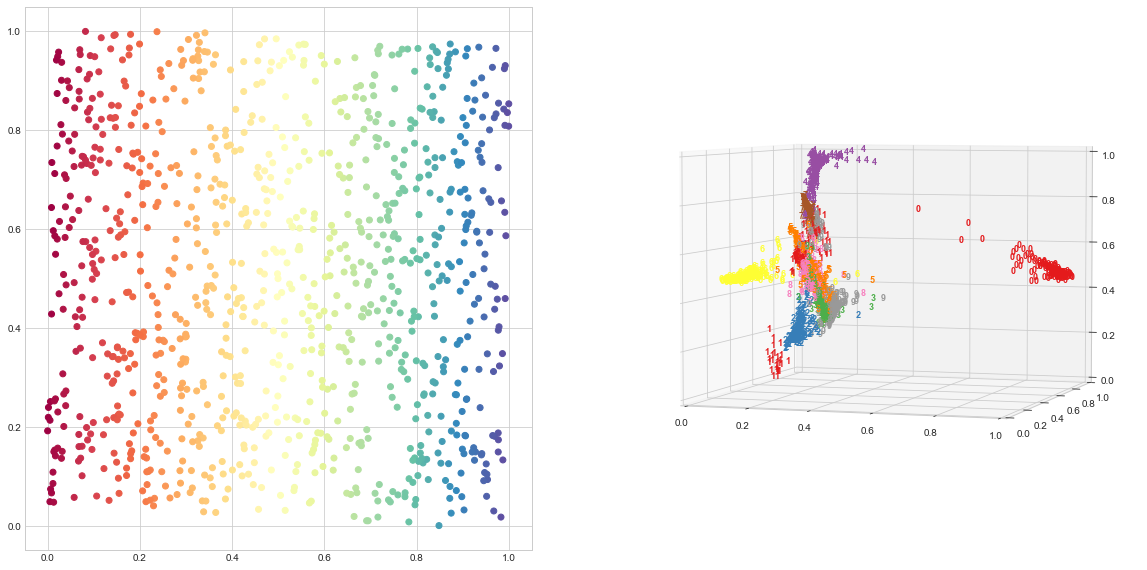

In [26]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_mlle, color, 121, '2d')
plot_digits(digits_mlle, labels, 122, '3d')

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [27]:
s_curve_isomap = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(s_curve)
digits_isomap = manifold.Isomap(n_neighbors=30, n_components=3).fit_transform(digits)

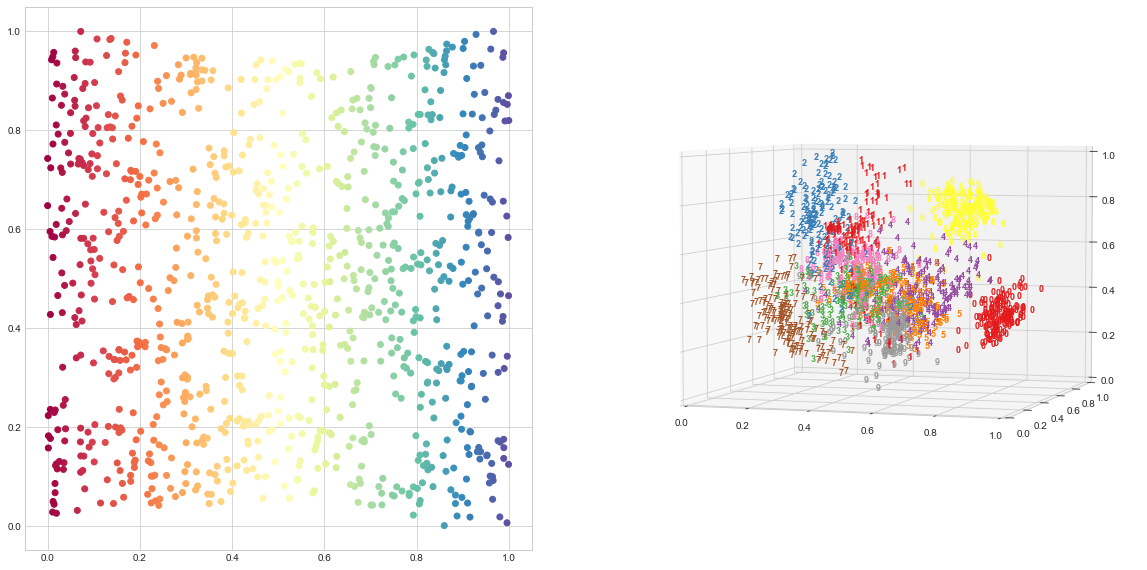

In [28]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_isomap, color, 121, '2d')
plot_digits(digits_isomap, labels, 122, '3d')

## Multi-Dimensional Scaling (MDS)

* 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음
  (시간이 오래 걸림)

In [29]:
s_curve_mds = manifold.MDS(n_components=2, random_state=2022).fit_transform(s_curve)
digits_mds = manifold.MDS(n_components=3, random_state=2022).fit_transform(digits)

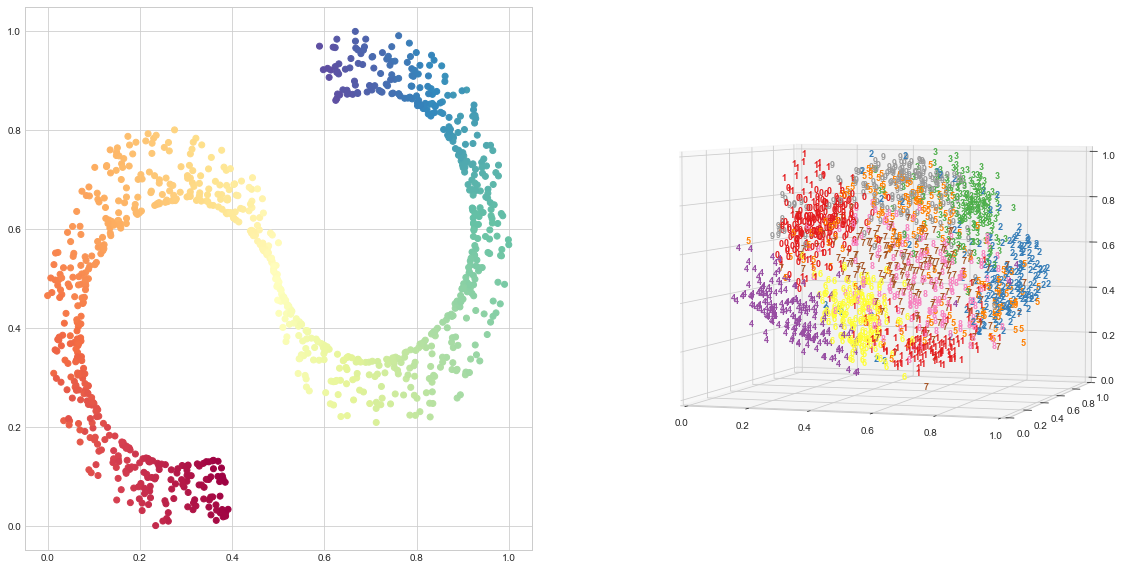

In [30]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_mds, color, 121, '2d')
plot_digits(digits_mds, labels, 122, '3d')

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [31]:
s_curve_se = manifold.SpectralEmbedding(n_components=2, random_state=2022).fit_transform(s_curve)
digits_se = manifold.SpectralEmbedding(n_components=3, random_state=2022).fit_transform(digits)

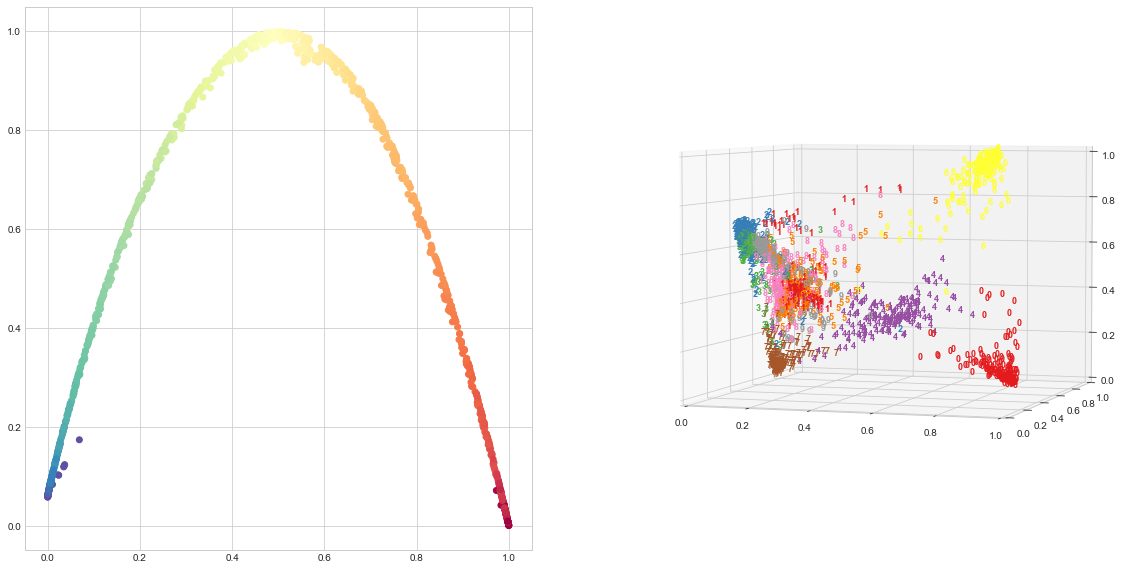

In [32]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_se, color, 121, '2d')
plot_digits(digits_se, labels, 122, '3d')

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* <span style='color:red'>데이터 포인트의 유사성을 확률로 변환<span>
* 국소 구조에 민감
* 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함
* 항상 KL발산의 국소 최소값에서 끝남
* 계산 비용이 많이 듬
* 전역 구조를 보존하지 않음

In [33]:
s_curve_tsne = manifold.TSNE(n_components=2, random_state=2022).fit_transform(s_curve)
digits_tsne = manifold.TSNE(n_components=3, random_state=2022).fit_transform(digits)

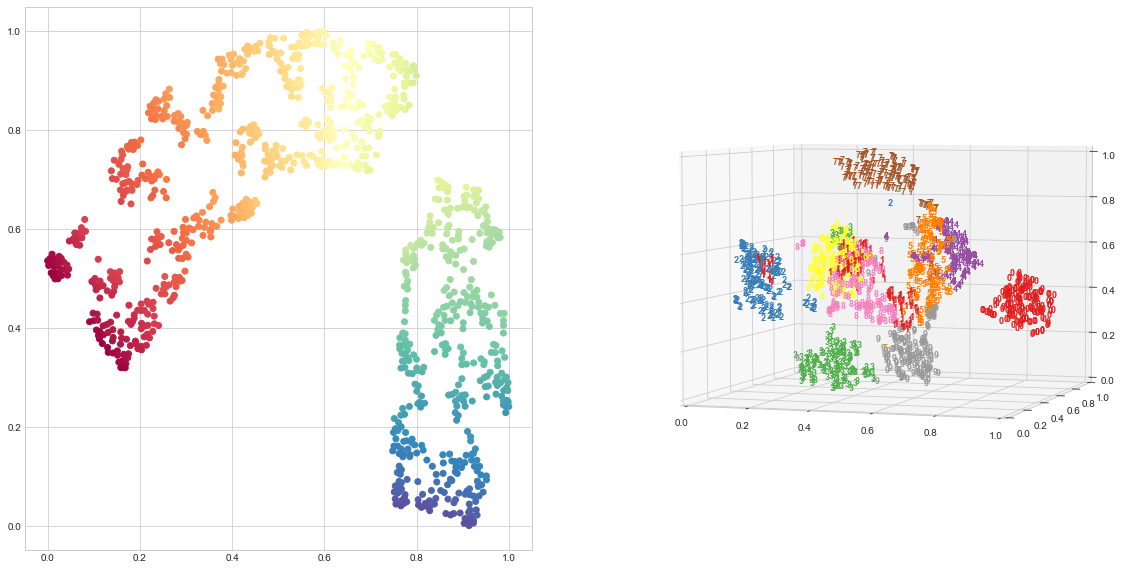

In [34]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_tsne, color, 121, '2d')
plot_digits(digits_tsne, labels, 122, '3d')

## 정제된 표현을 이용한 학습
* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [36]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [37]:
raw_digits, target = datasets.load_digits(return_X_y=True)

In [39]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

### 원본 데이터를 사용할 때

#### KNN

In [40]:
score = cross_val_score(estimator=knn,
                       X=raw_digits, y=target,
                       cv=5)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [42]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.9627282575054161 (+/- 0.011168537355954218)


#### SVM

In [43]:
score = cross_val_score(estimator=svm,
                       X=raw_digits, y=target,
                       cv=5)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [44]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.9632838130609718 (+/- 0.02008605863225686)


#### Decision Tree

In [45]:
score = cross_val_score(estimator=decision_tree,
                       X=raw_digits, y=target,
                       cv=5)
score

array([0.76944444, 0.69722222, 0.7994429 , 0.82729805, 0.79108635])

In [46]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.7768987929433612 (+/- 0.043939803793487664)


#### Random Forest

In [47]:
score = cross_val_score(estimator=random_forest,
                       X=raw_digits, y=target,
                       cv=5)
score

array([0.93055556, 0.925     , 0.95821727, 0.96657382, 0.91643454])

In [48]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.9393562364593006 (+/- 0.01952174632794821)


### 정제된 데이터를 사용할 때

#### KNN

In [53]:
score = cross_val_score(estimator=knn,
                       X=digits_lle, y=target,
                       cv=5)
score

array([0.58611111, 0.56666667, 0.62674095, 0.60724234, 0.59610028])

In [54]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.5965722686474775 (+/- 0.02013952928279712)


In [49]:
score = cross_val_score(estimator=knn,
                       X=digits_tsne, y=target,
                       cv=5)
score

array([0.96944444, 0.98611111, 0.98328691, 0.99164345, 0.94150418])

In [50]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.9743980191891056 (+/- 0.018000869779988472)


In [51]:
score = cross_val_score(estimator=knn,
                       X=digits_mds, y=target,
                       cv=5)
score

array([0.79166667, 0.73611111, 0.7994429 , 0.78551532, 0.76044568])

In [52]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.7746363354998452 (+/- 0.0232779618055761)


#### SVM

In [55]:
score = cross_val_score(estimator=svm,
                       X=digits_lle, y=target,
                       cv=5)
score

array([0.60833333, 0.57777778, 0.62116992, 0.66016713, 0.6183844 ])

In [56]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.6171665119158155 (+/- 0.02644262149403159)


In [57]:
score = cross_val_score(estimator=svm,
                       X=digits_tsne, y=target,
                       cv=5)
score

array([0.95277778, 0.96111111, 0.98328691, 0.98885794, 0.93593315])

In [58]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.9643933766635717 (+/- 0.01955075633830812)


In [59]:
score = cross_val_score(estimator=svm,
                       X=digits_mds, y=target,
                       cv=5)
score

array([0.78888889, 0.71388889, 0.76880223, 0.8189415 , 0.75208914])

In [60]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.7685221293717115 (+/- 0.03524721528088039)


#### Decision Tree

In [61]:
score = cross_val_score(estimator=decision_tree,
                       X=digits_lle, y=target,
                       cv=5)
score

array([0.53055556, 0.49444444, 0.545961  , 0.57103064, 0.49303621])

In [62]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.5270055710306407 (+/- 0.030080764211417726)


In [63]:
score = cross_val_score(estimator=decision_tree,
                       X=digits_tsne, y=target,
                       cv=5)
score

array([0.97222222, 0.93611111, 0.94707521, 0.96100279, 0.94428969])

In [64]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.9521402042711233 (+/- 0.012853398886708715)


In [65]:
score = cross_val_score(estimator=decision_tree,
                       X=digits_mds, y=target,
                       cv=5)
score

array([0.7       , 0.67222222, 0.71587744, 0.74094708, 0.70473538])

In [66]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.7067564221603219 (+/- 0.02233624188047359)


#### Random Forest

In [67]:
score = cross_val_score(estimator=random_forest,
                       X=digits_lle, y=target,
                       cv=5)
score

array([0.58055556, 0.54444444, 0.59610028, 0.61559889, 0.62116992])

In [68]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.5915738161559888 (+/- 0.02762680484314267)


In [69]:
score = cross_val_score(estimator=random_forest,
                       X=digits_tsne, y=target,
                       cv=5)
score

array([0.96111111, 0.95      , 0.98050139, 0.99164345, 0.96935933])

In [70]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.9705230578768184 (+/- 0.014538041179695135)


In [71]:
score = cross_val_score(estimator=random_forest,
                       X=digits_mds, y=target,
                       cv=5)
score

array([0.75833333, 0.71944444, 0.76880223, 0.80779944, 0.73259053])

In [72]:
print('mean cross val score : {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score : 0.7573939956669762 (+/- 0.03074774666367419)
